In [133]:
%load_ext autoreload
%autoreload 2

import os, pprint

import numpy as np
import tifffile
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

import pyabf

import lcranalysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
dataPath = '/Users/cudmore/data/dual-lcr/'
dataList = []
# 20201222
dataList.append({
    'tif': f'{dataPath}20201222/data/20201222_.tif',
    'abf': f'{dataPath}20201222/data/20d22000.abf',
    })
dataList.append({
    'tif': f'{dataPath}20201222/data/20201222__0001.tif',
    'abf': f'{dataPath}20201222/data/20d22001.abf',
    })

# 20210115
dataList += [{
    'tif': f'{dataPath}20210115/data/20210115_.tif',
    'abf': f'{dataPath}20210115/data/21115001.abf',
    }]
dataList += [{
    'tif': f'{dataPath}20210115/data/20210115__0001.tif',
    'abf': f'{dataPath}20210115/data/21115002.abf',
    }]
dataList += [{
    'tif': f'{dataPath}20210115/data/20210115__0002.tif',
    'abf': f'{dataPath}20210115/data/21115003.abf',
    }]

# 20210120
# no APs
dataList += [{
    'tif': f'{dataPath}20210120/data/20210120_.tif',
    'abf': f'{dataPath}20210120/data/2021_01_20_0000.abf',
    }]
# no APs
dataList += [{
    'tif': f'{dataPath}20210120/data/20210120__0001.tif',
    'abf': f'{dataPath}20210120/data/2021_01_20_0001.abf',
    }]

# 20210122
# no APs
dataList += [{
    'tif': f'{dataPath}20210122/data/20210122_.tif',
    'abf': f'{dataPath}20210122/data/2021_01_22_0000.abf',
    }]

dataList += [{
    'tif': f'{dataPath}20210122/data/20210122__0001.tif',
    'abf': f'{dataPath}20210122/data/2021_01_22_0001.abf',
    }]

dataList += [{
    'tif': f'{dataPath}20210122/data/20210122__0002.tif',
    'abf': f'{dataPath}20210122/data/2021_01_22_0002.abf',
    }]

# LS across cell nucleus
dataList += [{
    'tif': f'{dataPath}20210122/data/20210122__0005.tif',
    'abf': f'{dataPath}20210122/data/2021_01_22_0004.abf',
    }]

dataList += [{
    'tif': f'{dataPath}20210122/data/20210122__0006.tif',
    'abf': f'{dataPath}20210122/data/2021_01_22_0005.abf',
    }]

# no APs
dataList += [{
    'tif': f'{dataPath}20210122/data/20210122__0008-v2.tif',
    'abf': f'{dataPath}20210122/data/2021_01_22_0006.abf',
    }]

for idx, recording in enumerate(dataList):
    if not os.path.isfile(recording['tif']):
        print(idx, 'tif file not found:', recording['tif'])
    if not os.path.isfile(recording['abf']):
        print(idx, 'abf file not found:', recording['abf'])
    print(idx)
    print('  ', recording['tif'])
    print('  ', recording['abf'])

0
   /Users/cudmore/data/dual-lcr/20201222/data/20201222_.tif
   /Users/cudmore/data/dual-lcr/20201222/data/20d22000.abf
1
   /Users/cudmore/data/dual-lcr/20201222/data/20201222__0001.tif
   /Users/cudmore/data/dual-lcr/20201222/data/20d22001.abf
2
   /Users/cudmore/data/dual-lcr/20210115/data/20210115_.tif
   /Users/cudmore/data/dual-lcr/20210115/data/21115001.abf
3
   /Users/cudmore/data/dual-lcr/20210115/data/20210115__0001.tif
   /Users/cudmore/data/dual-lcr/20210115/data/21115002.abf
4
   /Users/cudmore/data/dual-lcr/20210115/data/20210115__0002.tif
   /Users/cudmore/data/dual-lcr/20210115/data/21115003.abf
5
   /Users/cudmore/data/dual-lcr/20210120/data/20210120_.tif
   /Users/cudmore/data/dual-lcr/20210120/data/2021_01_20_0000.abf
6
   /Users/cudmore/data/dual-lcr/20210120/data/20210120__0001.tif
   /Users/cudmore/data/dual-lcr/20210120/data/2021_01_20_0001.abf
7
   /Users/cudmore/data/dual-lcr/20210122/data/20210122_.tif
   /Users/cudmore/data/dual-lcr/20210122/data/2021_01_22_

In [173]:
def myLoad(myDict):
    tifFile = myDict['tif']
    abfFile = myDict['abf']

    # todo: check they exist
    
    tif = lcranalysis.loadLineScan(tifFile)
    #print('tif.shape:', tif.shape)
    #print('tif.dtype:', tif.dtype)
    if len(tif.shape) == 3:
        tif = tif[:,:,1] # assuming image channel is 1
    tif = np.rot90(tif) # rotates 90 degrees counter-clockwise
    f0 = tif.mean()
    tifNorm = tif / f0
    #print(type(tifNorm))
    
    tifHeader = lcranalysis.loadLineScanHeader(tifFile)
    tifHeader['shape'] = tifNorm.shape
    
    abf = pyabf.ABF(abfFile)

    return tif, tifHeader, abf

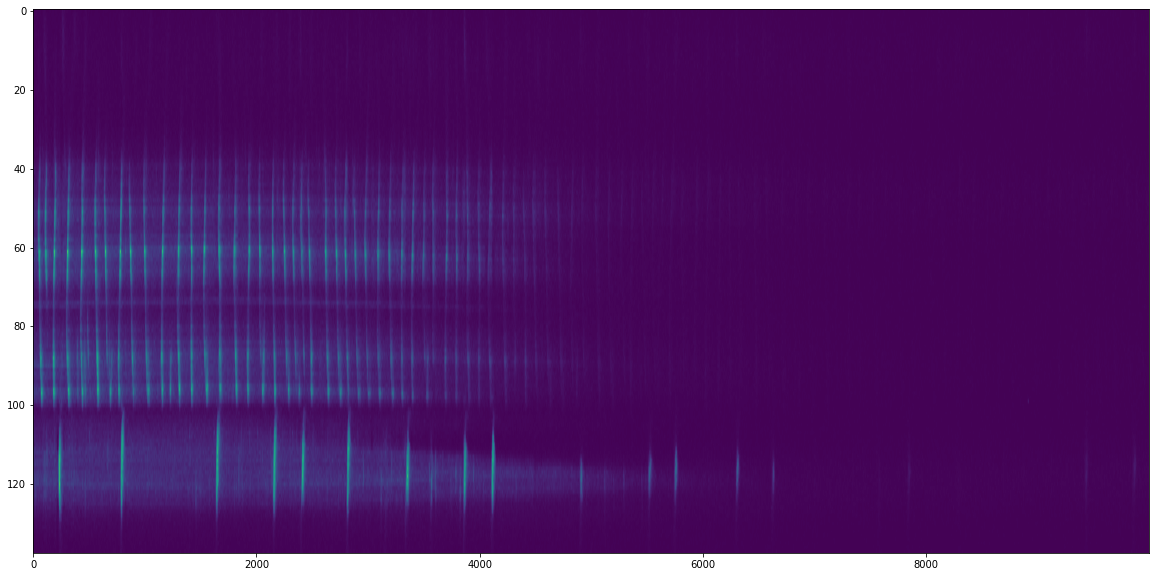

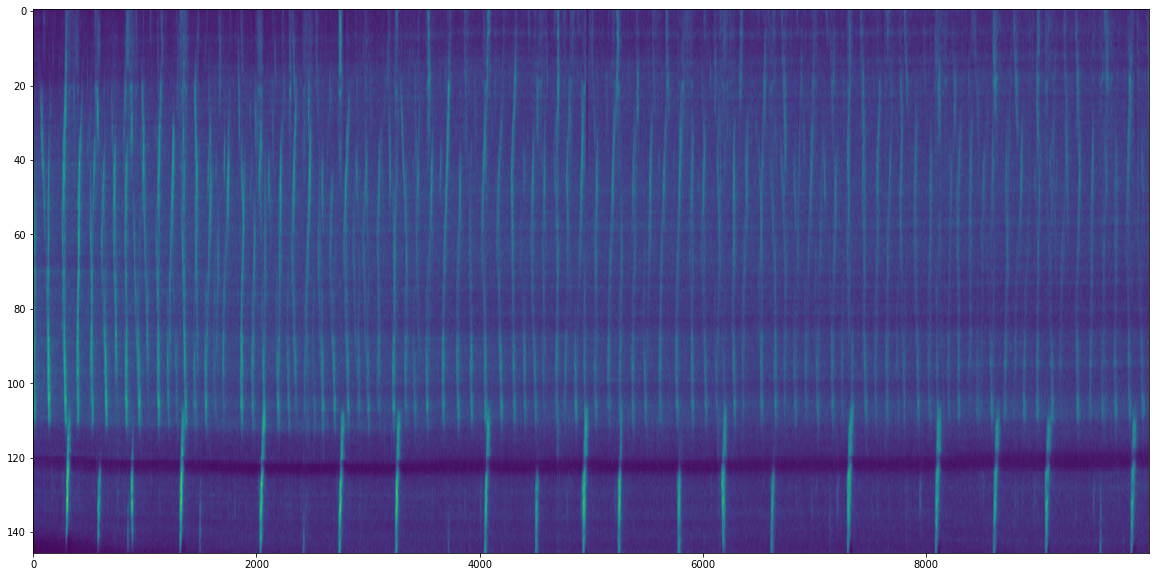

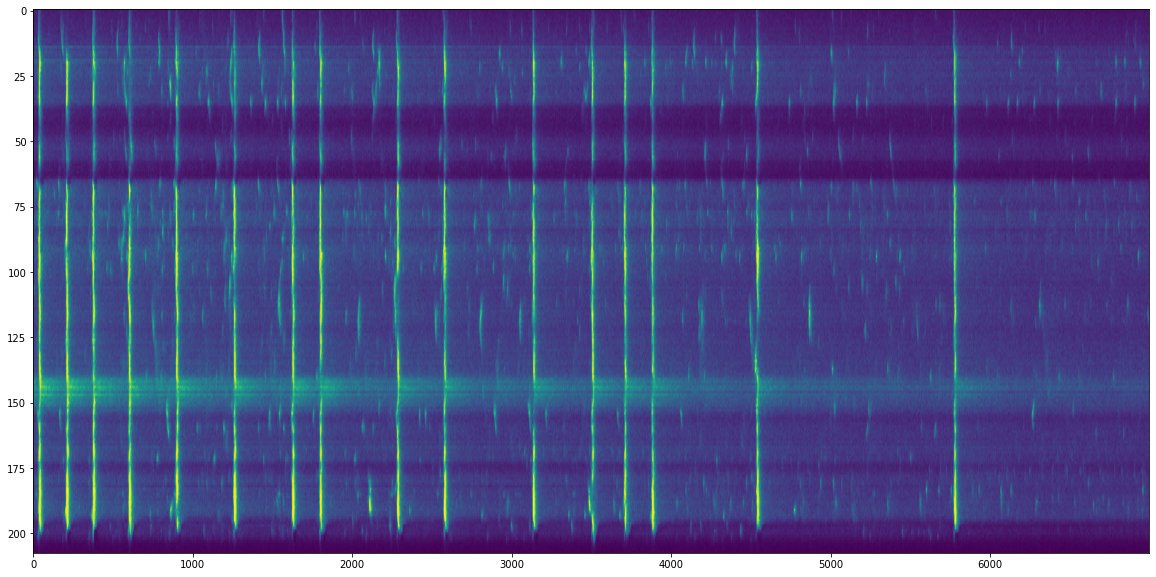

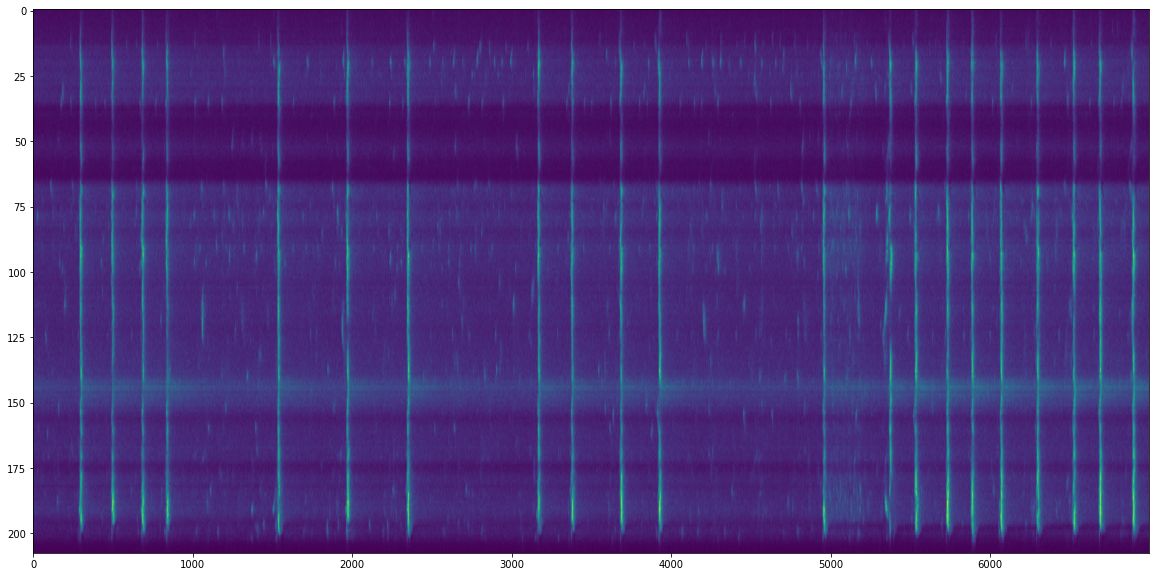

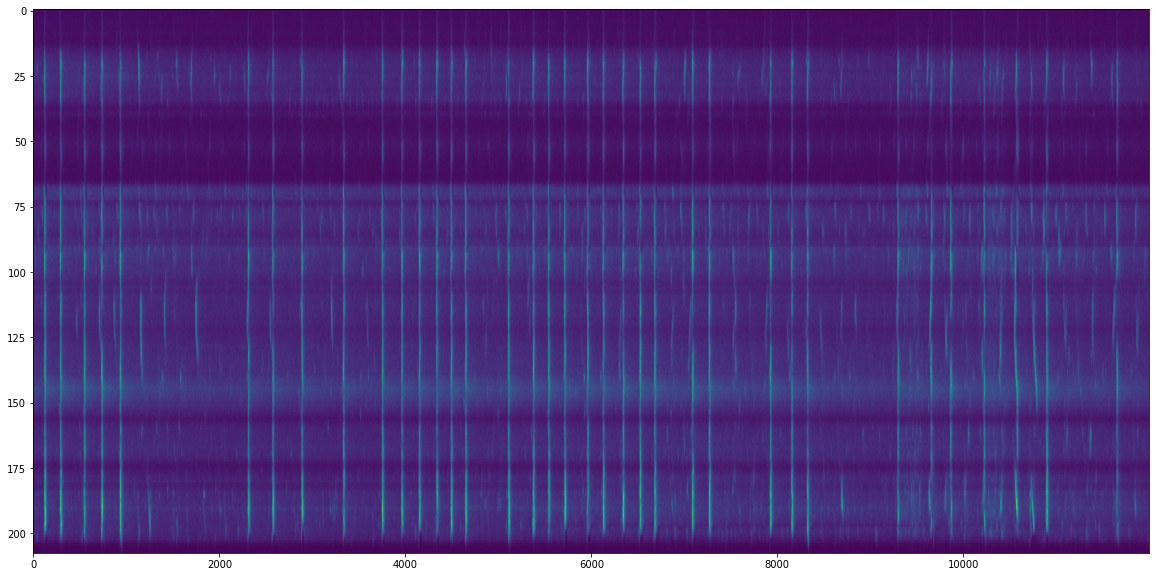

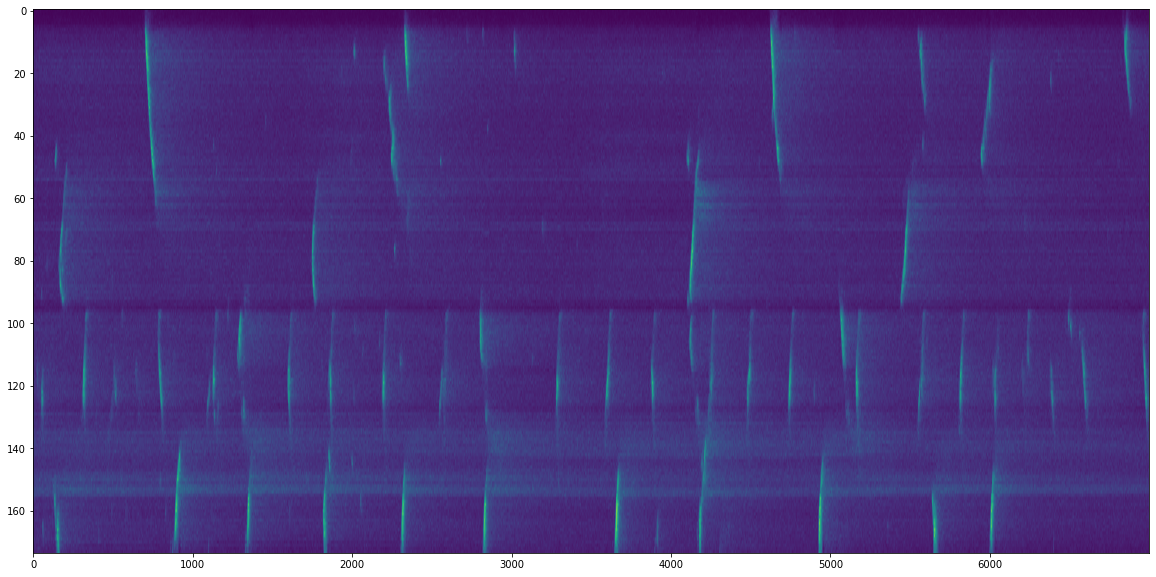

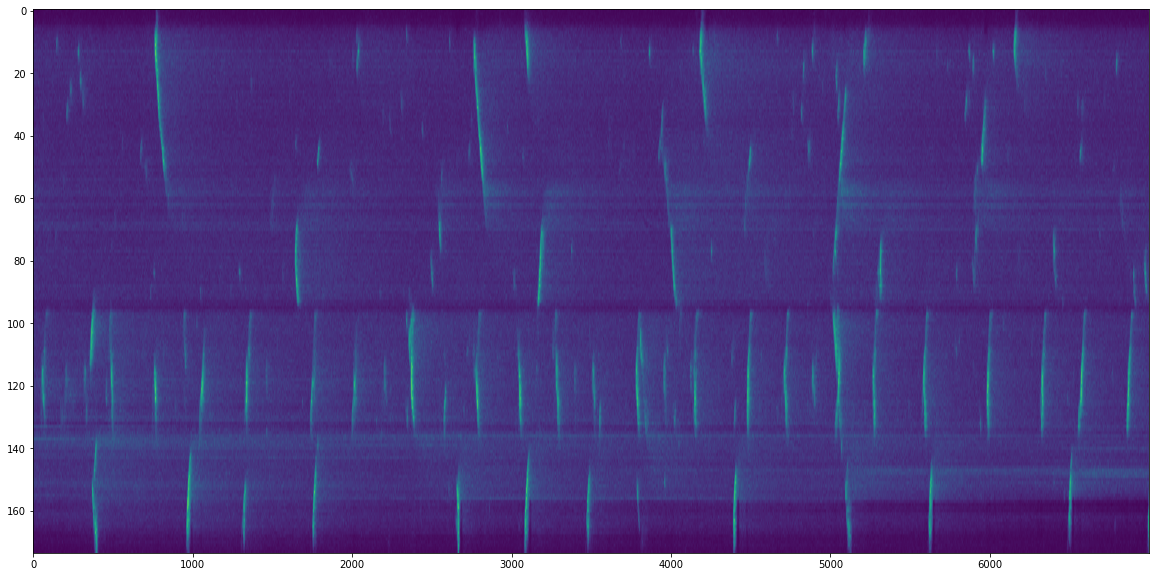

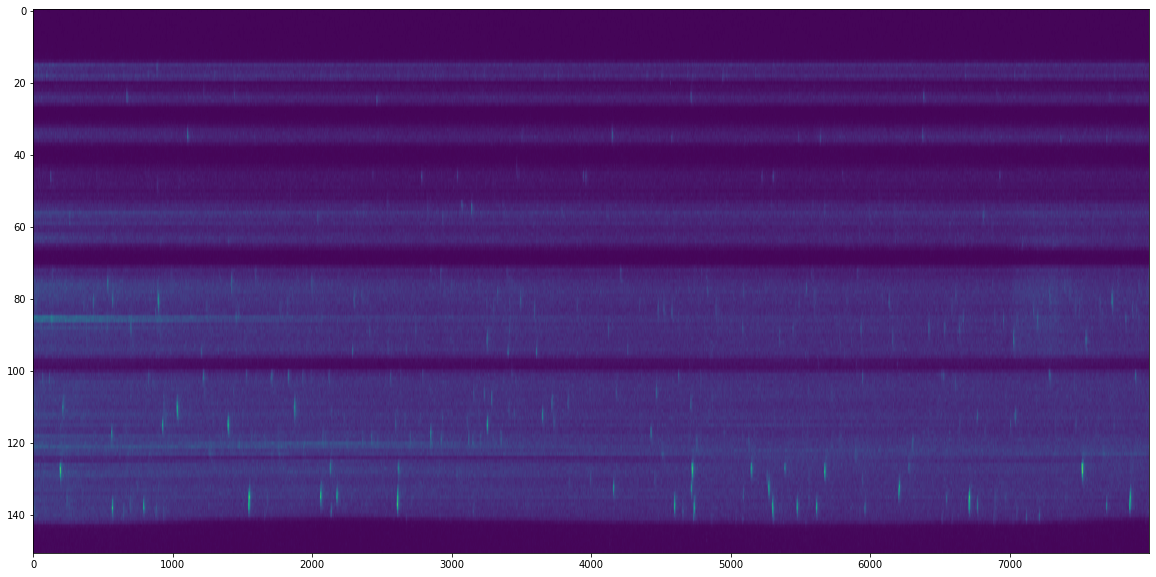

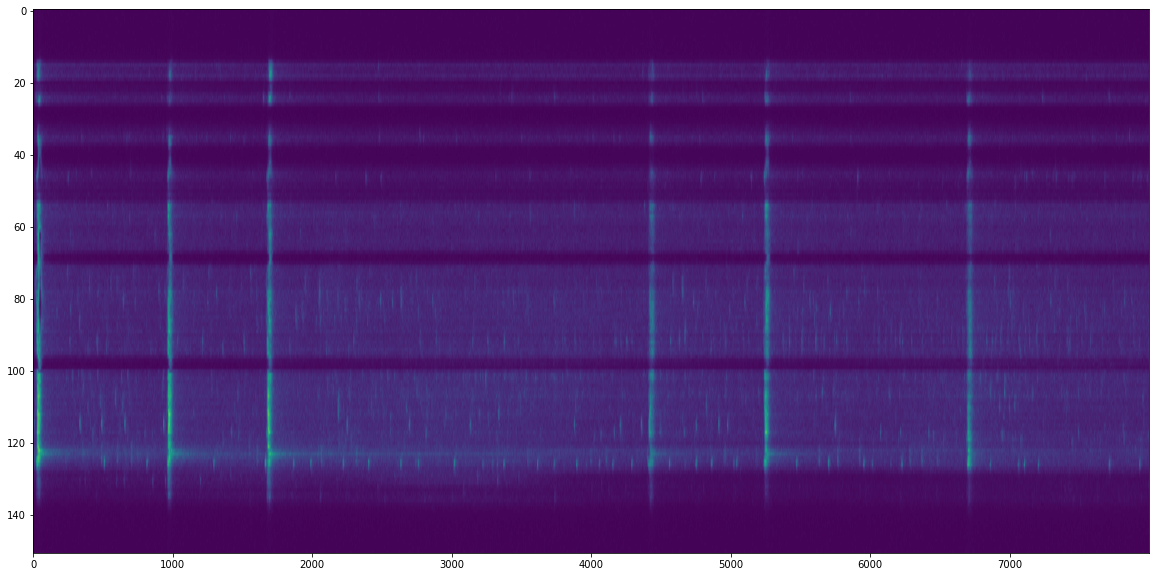

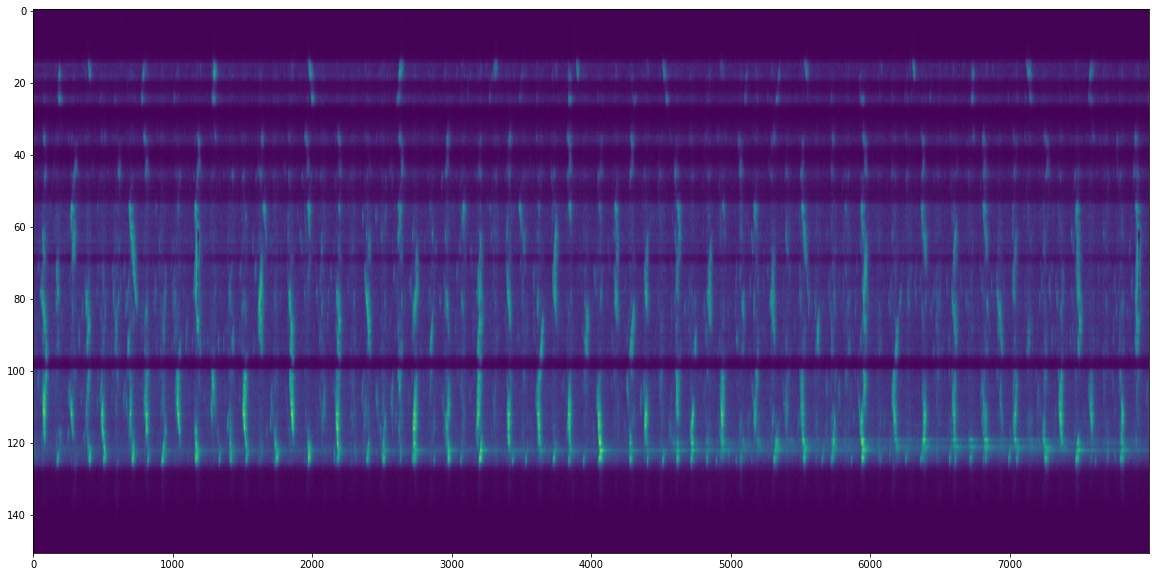

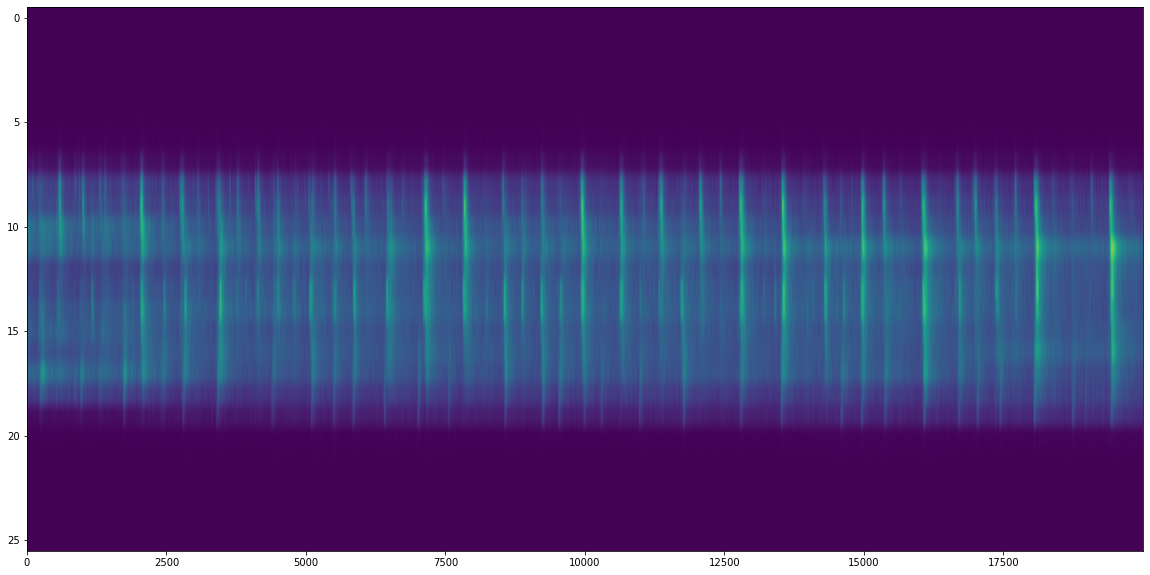

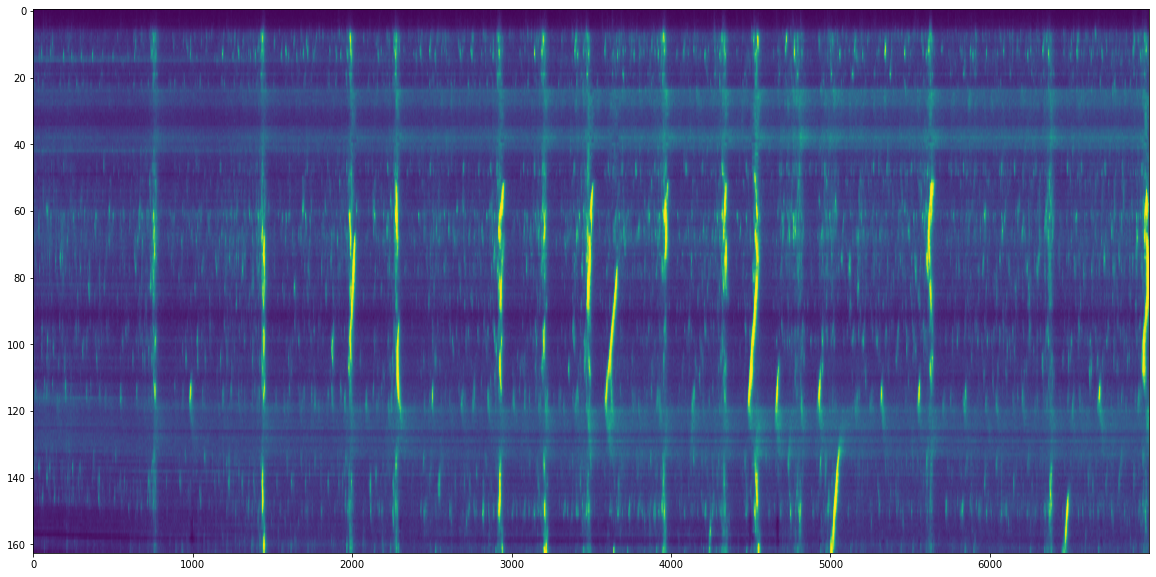

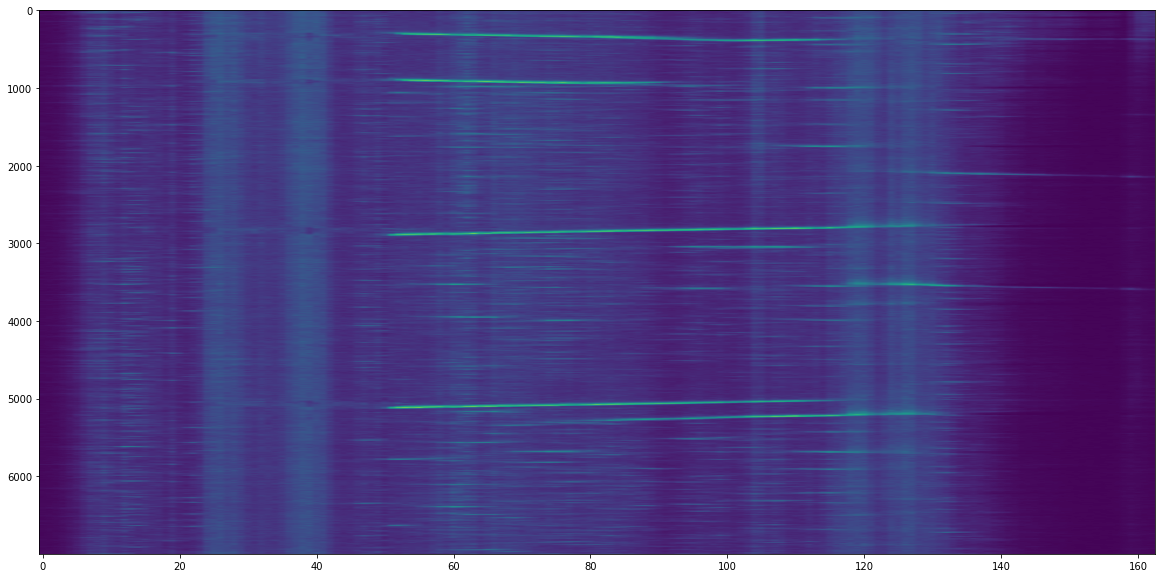

In [176]:
for fileNumber in range(len(dataList)):
    #print(dataList[fileNumber]['tif'])
    tif, tifHeader, abf = myLoad(dataList[fileNumber])
    #tif = np.rot90(tif) # rotates 90 degrees counter-clockwise

    fig, axs = plt.subplots(1, 1, sharex=False)
    #plt.rcParams["figure.figsize"] = (20,10)
    axs.imshow(tif, aspect='auto')



tifFile: /Users/cudmore/data/dual-lcr/20210115/data/20210115_.tif
abfFile: /Users/cudmore/data/dual-lcr/20210115/data/21115001.abf
{'numPixels': 208,
 'shape': (208, 7000),
 'tif': '/Users/cudmore/data/dual-lcr/20210115/data/20210115_.tif',
 'totalSeconds': 29.746,
 'umLength': 172.357,
 'umPerPixel': 0.829}
xMaxRecording: 24.8949


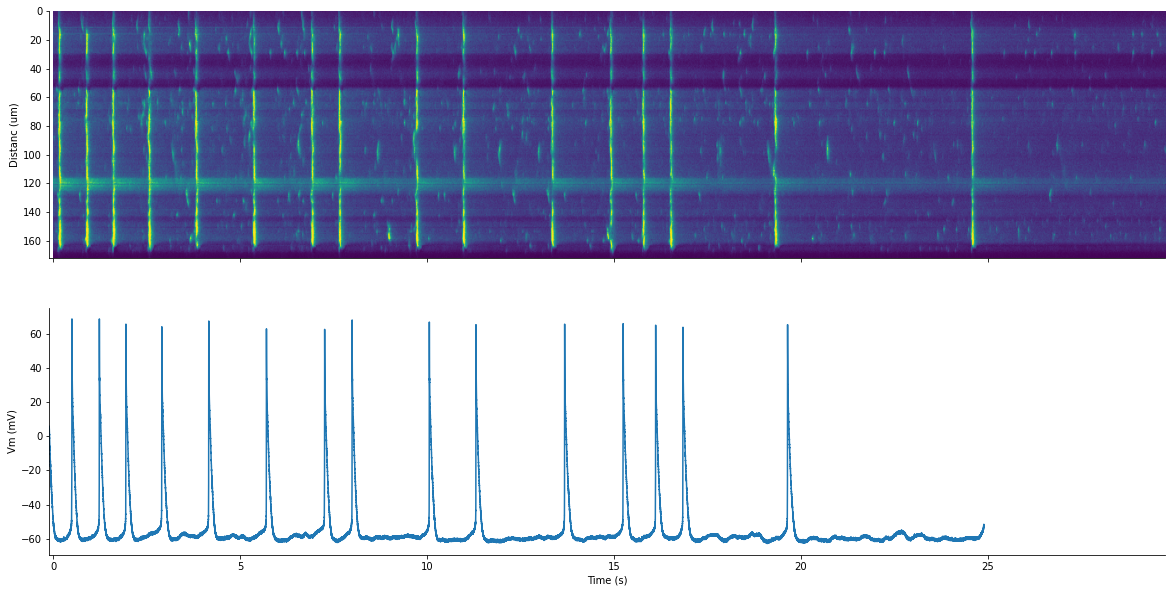

In [175]:
fileNumber = 2

print('tifFile:', dataList[fileNumber]['tif'])
print('abfFile:', dataList[fileNumber]['abf'])

tif, tifHeader, abf = myLoad(dataList[fileNumber])
xMaxImage = tifHeader['totalSeconds'] #35.496 # seconds
pprint.pprint(tifHeader)

#fig, axs = plt.subplots(2, 1, figsize=(18, 6), sharex=True)
#fig, axs = plt.subplots(2, 1, sharex=True)
fig, axs = plt.subplots(2, 1, sharex=True)

# e-phys
# has 100 ms + 5 ms ttl
preRoll = 100 / 1000 # ms -> sec
ttlDur = 5 / 1000 # ms -> sec
xMinPhys = (preRoll + ttlDur) * -1

#print(abf.headerText)
xPlot = abf.sweepX
xPlot += xMinPhys # e-phys recording starts with (100 ms + 5 ms ttl)
yPlot = abf.sweepY
xMaxRecording = abf.sweepX[-1] # seconds
print('xMaxRecording:', xMaxRecording)

xMax = max(xMaxImage, xMaxRecording)

# image
xMin = 0
yMin = 0
yMax = tifHeader['umLength'] #57.176
extent = [xMin, xMaxImage, yMax, yMin] # flipped y
axs[0].imshow(tif, aspect='auto', extent=extent)
#axs[0].imshow(tif, aspect='auto')
axs[0].set_xlim([xMinPhys, xMax])
axs[0].set_ylabel('Line (um)')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)

axs[1].plot(xPlot, yPlot)
axs[1].margins(x=0)
axs[1].set_xlim([xMinPhys, xMax])
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Vm (mV)')
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
